# Pymaceuticals data analysis observations:
---

In [ ]:
Results and Discussion:
    The pymaceuticals data consisted a total of 1893 observations. The number of unique mice ID was calculated to be 249. 
    There was duplication in the data for a specific mouse ID (g989). 
    The dataframe was cleaned by remvoing the duplicated mouse ID data and further analysis was conducted.
    
    Of the total 1880 mice included in data analysis, 51% were  male and 49% were female. 
    Further, to quantitatively determine if the data consisted of any potential outliers, the IQR was calculated for the final tumor volume of each mouse across four of the treatment regimens:  
    Capomulin, Ramicane, Infubinol, and Ceftamin.
    The data for Infubinol showed a potential outlier in the final tumor volume (outlier value: 36.321346).
    This was also qualitatively represented in a box and whisker plot.
    
    
    The purpose of this study was to compare the performance of Pymaceuticals drug of interest, Capomulin, versus the other treatment regimens.
    So the data was grouped based on the mouse treated with Capomulin.
    Mouse ID "l509" that was treated with Capomulin was selected and line plot of tumor volume vs. time point was generated.
    
    Based on the line plot, it is evident that the tumor volume drastically decreased during the timepoint of 30-40 days when treated with Capomulin.
    
    A scatter plot was generated with average tumor volume vs. mouse weight for the Capomulin regimen, which showed that as the weight increases the tumor volume also increased.
    
    The correlation between mouse weight and the average tumor volume was calculated to be 0.84 based on Pearsons correlation coefficient.
    Since the value is more inclined towards 1, there is said to be a moderate positive correlation between the variables, 
    which means that the weight of the tumor volume is directly proportional to the mouse weight.
    
    

# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])


In [3]:
# Display the data table for preview
mousestudy_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
mice_total=mousestudy_df["Mouse ID"].count()
mice_total

1893

In [5]:
# Checking the number of mice.
mice_number=mousestudy_df.nunique()["Mouse ID"]
mice_number

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df=mousestudy_df[mousestudy_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice_id=duplicates_df.iloc[0, :]
dup_mice_id.head(1)

Mouse ID    g989
Name: 137, dtype: object

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_miceid=mousestudy_df[mousestudy_df['Mouse ID'] == 'g989']
dup_miceid

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mousestudy_df.loc[mousestudy_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
# Checking the number of mice in the clean DataFrame.
mice_id=clean_df['Mouse ID'].value_counts()
mice_num=len(mice_id)
mice_num

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

stat_study_df = mousestudy_df.set_index("Drug Regimen")
stat_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.0,0,Female,9,22
Ketapril,f932,0,45.0,0,Male,15,29
Ketapril,g107,0,45.0,0,Female,2,29
Ketapril,a457,0,45.0,0,Female,11,30
Ketapril,c819,0,45.0,0,Male,21,25


In [15]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=mousestudy_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
print(mean)
median=mousestudy_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
print(median)
variance=mousestudy_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
print(variance)
std=mousestudy_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
print(std)
sem=mousestudy_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
print(sem)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

In [16]:
# Assemble the resulting series into a single summary dataframe.
summary_stat=pd.DataFrame({"Mean Tumor Volume":mean,
                           "Median Tumor Volume":  median,
                           "Tumor Volume Variance":variance,
                           "Tumor Volume Std. Dev.":  std,
                           "Tumor Volume Std. Err.": sem})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

stat_agg_df=mousestudy_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
stat_agg_df                                          

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [18]:
unique_micenum = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
unique_mice=unique_micenum.sort_values(ascending=False)
print(unique_mice)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64


<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Unique Mice Tested'>

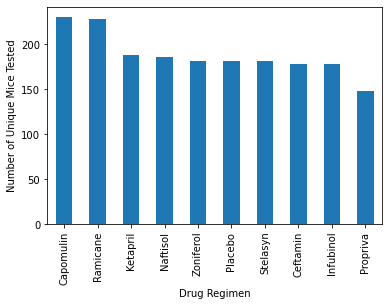

In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice.plot(kind = "bar", x = "Drug Regimen", y = "unique_micenum", ylabel= "Number of Unique Mice Tested") 

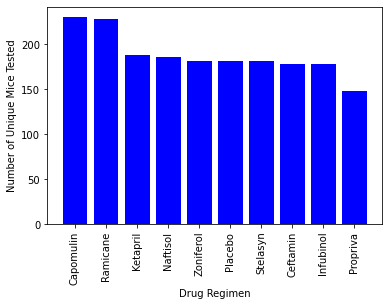

In [20]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
x_axis=unique_mice.index.values
y_axis=unique_mice
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.bar(x_axis, y_axis, facecolor="b", alpha=1, align="center")
plt.xticks(rotation=90)

plt.show()

In [22]:
gender_chart=clean_df.groupby(['Sex'])
gender_num=gender_chart['Sex'].count()
gender_num

Sex
Female    922
Male      958
Name: Sex, dtype: int64

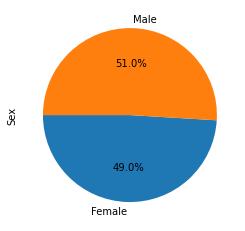

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie=gender_num.plot(kind="pie", y= 'Sex', autopct="%1.1f%%", startangle=180)
plt.show()

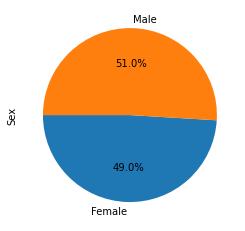

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis=gender_num
label=gender_num.index.values
plt.pie(x_axis, labels=label, autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=clean_df.groupby(['Mouse ID'])[['Timepoint']].max()
print(last_timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df=pd.merge(last_timepoint, clean_df,on= ["Mouse ID", "Timepoint"])
merge_df.head()

          Timepoint
Mouse ID           
a203             45
a251             45
a262             45
a275             45
a366             30
...             ...
z435             10
z578             45
z581             45
z795             45
z969             45

[248 rows x 1 columns]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    merge_drug=merge_df.loc[merge_df["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
      # add subset 
    tumor_vol_list.append(merge_drug)
    #print(tumor_vol_list)
    
   
    quartiles = merge_drug.quantile([.25,.5,.75])
    #print(quartiles)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    
 # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    
    outliers=merge_drug.loc[(merge_drug<lower_bound)| (merge_drug>upper_bound)]
    print(f"{drug}'s potential outliers : {outliers}")

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Value

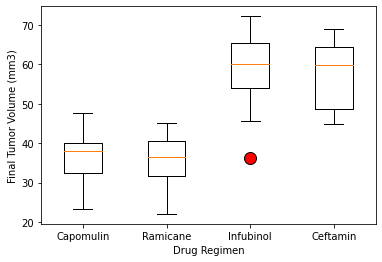

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1=plt.subplots()
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")

flierprops=dict(marker="o", markerfacecolor="r", markersize=12, markeredgecolor="k")
                  
plt.boxplot(tumor_vol_list, labels= treatment_list, flierprops=flierprops )
plt.show()

## Line and Scatter Plots

In [30]:
#locating Capomulin drug data from the cleaned dataframe
capomulin_drug=clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]

#loacting the mouse l509 treated with capomulin
capomulin_treated=capomulin_drug.loc[clean_df["Mouse ID"]== "l509"]
print(capomulin_treated)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
231      l509          0           45.000000                 0    Capomulin   
253      l509          5           45.851193                 0    Capomulin   
539      l509         10           46.759074                 0    Capomulin   
881      l509         15           47.488599                 1    Capomulin   
982      l509         20           48.070452                 2    Capomulin   
1146     l509         25           44.006257                 2    Capomulin   
1414     l509         30           44.708055                 2    Capomulin   
1499     l509         35           40.207288                 2    Capomulin   
1723     l509         40           40.770813                 2    Capomulin   
1771     l509         45           41.483008                 3    Capomulin   

       Sex  Age_months  Weight (g)  
231   Male          17          21  
253   Male          17          21  
539   Male         

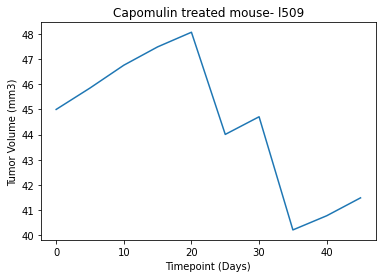

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis=capomulin_treated["Timepoint"]
y_axis=capomulin_treated["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Capomulin treated mouse- l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


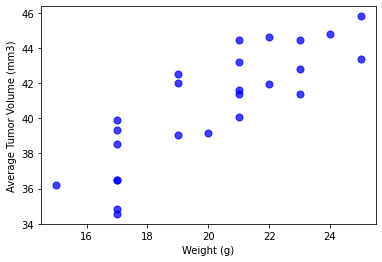

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_capomulin = capomulin_drug.groupby("Mouse ID").mean()

x_axis=avg_capomulin["Weight (g)"]
y_axis=avg_capomulin["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o", s=50, facecolors="blue", alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [33]:
#dataframe with average tumor volume and weight for the Capomulin regimen
avg_capomulin.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


In [34]:
# Calculate the correlation coefficient
#for mouse weight and average tumor volume for the Capomulin regimen

#mouse_weight = avg_capomulin.iloc[5,:]
#tumor_volume = avg_capomulin.iloc[2,:]
x_axis=avg_capomulin["Weight (g)"]
y_axis=avg_capomulin["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between mouse weight and the average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume for the Capomulin regimen is 0.84


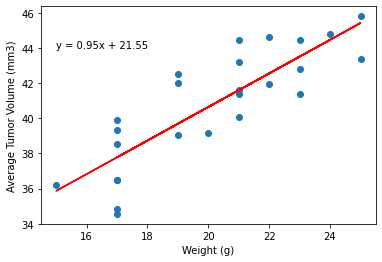

In [35]:
# Calculate the linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(15,44),fontsize=10,color="k")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()